<a href="https://colab.research.google.com/github/faustogutman/Analysies/blob/main/Copy_of_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI - Lab 1**

**Graph Neural Networks**

https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html

We will use graph neural network using PyTorch Geometric (PyG) and apply it to 2 graphs.

We will evaluate our model on predicting the properties of single nodes.

The steps we will learn in this class:

1. Store graphs as PyTorch tensors in PyG.
2. Load and inspect one of the Open Graph Benchmark (OGB) datasets by using the `ogb` package (a collection of datasets for machine learning on graphs).
3. Build, train, and evaluate a GNN model on the OGB node property prediction using PyG.


Set a GPU to run quickly by clicking `Runtime` --> `Change runtime type`--> `hardware accelerator` **GPU**.

## Run on google colab servers

Check PyTorch version

In [4]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


1.12.0+cu113


## PyTorch Geometric (PyG)


A graph in PyG is described by an instance of ``torch_geometric.data.Data``, which holds the following attributes:

``data.x``: Node feature matrix with shape ``[num_nodes, num_node_features]``

``data.edge_index``: Graph connectivity with shape ``[2, num_edges]`` and type torch.long. This is a transposed edgelist tensor

``data.edge_attr``: Edge feature matrix with shape ``[num_edges, num_edge_features]``

``data.y``: Target to train against (may have arbitrary shape), e.g., node-level targets of shape ``[num_nodes, *]`` or graph-level targets of shape ``[1, *]``

`data.pos`: Node position matrix with shape ``[num_nodes, num_dimensions]``

None of these attributes are mandatory.

## Example 1

An example of an unweighted and undirected graph with 3 nodes and 4 edges. 

Each node contains exactly 1 feature.

In [6]:
import os
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)

x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

print(data)

Data(x=[3, 1], edge_index=[2, 4])


How you need to define the edge_indices:


```
df = pd.read_cev('/path/to/atom.csv')

# df['from'] and df['to'] are node id

edge_index = torch.tensor([df['from'],
                           df['to']], dtype=torch.long)

edge_index.shape
```

In [9]:
import pandas as pd

df = pd.read_csv('/content/bond.csv')#/atom.csv/content/bond.csv
df=df[['atom_id','atom_id2']]
df.sort_values(by='atom_id').head(10)
df['atom_id_num']=df['atom_id'].apply(lambda x: int(x.replace('i','').replace('_','')))
df['atom_id2_num']=df['atom_id2'].apply(lambda x: int(x.replace('i','').replace('_','')))
# df_id = pd.read_csv('/bond_num_id.csv')#/atom.csv
df

,atom_id,atom_id2,atom_id_num,atom_id2_num
0,i100_02_7_10i,i100_02_7_10_1i,10002710,100027101
1,i100_02_7_1i,i100_02_7_2i,1000271,1000272
2,i100_02_7_2i,i100_02_7_3i,1000272,1000273
3,i100_02_7_2i,i100_02_7_4i,1000272,1000274
4,i100_02_7_4i,i100_02_7_10i,1000274,10002710
...,...,...,...,...
995,i1162_65_8_5i,i1162_65_8_5_1i,11626585,116265851
996,i1162_65_8_5i,i1162_65_8_6i,11626585,11626586
997,i1162_65_8_6i,i1162_65_8_7i,11626586,11626587
998,i1162_65_8_7i,i1162_65_8_23i,11626587,116265823


In [10]:
df_x = pd.read_csv('/content/atom.csv')#/atom.csv
df_x['atom_id_num']=df_x['atom_id'].apply(lambda x: int(x.replace('i','').replace('_','')))
df_x['molecule_id_num']=df_x['molecule_id'].apply(lambda x: int(x.replace('i','').replace('_','')))
df_x.head()
df_x.shape
df_x


,atom_id,molecule_id,type,atom_id_num,molecule_id_num
0,i100_02_7_10i,i100_02_7i,c,10002710,100027
1,i100_02_7_10_1i,i100_02_7i,h,100027101,100027
2,i100_02_7_1i,i100_02_7i,o,1000271,100027
3,i100_02_7_2i,i100_02_7i,n,1000272,100027
4,i100_02_7_3i,i100_02_7i,o,1000273,100027
...,...,...,...,...,...
995,i1162_65_8_20i,i1162_65_8i,o,116265820,1162658
996,i1162_65_8_21i,i1162_65_8i,o,116265821,1162658
997,i1162_65_8_22i,i1162_65_8i,c,116265822,1162658
998,i1162_65_8_23i,i1162_65_8i,c,116265823,1162658


In [11]:
df_x[df_x['atom_id_num']==10002710]

,atom_id,molecule_id,type,atom_id_num,molecule_id_num
0,i100_02_7_10i,i100_02_7i,c,10002710,100027


In [12]:
df_x['atom_id_num'].drop_duplicates().shape

(990,)

In [13]:
df['atom_id_num'].drop_duplicates().shape

(462,)

In [14]:
df['atom_id2_num'].drop_duplicates().shape

(940,)

In [15]:
# [for i in list(df['atom_id_num'].drop_duplicates()) if  elem in list(df['atom_id_num'].drop_duplicates())]

nodes1=[f for f in list(df['atom_id_num'].drop_duplicates()) if f in list(df['atom_id2_num'].drop_duplicates()) ]
nodes2=[f for f in list(df['atom_id2_num'].drop_duplicates()) if f in list(df['atom_id_num'].drop_duplicates()) ]
len(nodes2)

404

In [16]:
sum(nodes1)==sum(nodes2)

True

In [17]:
# df[df['atom_id'] in nodes]
new_df=df[(df['atom_id_num'].isin(nodes1)) ]
new_df=df[(df['atom_id2_num'].isin(nodes2)) ]
new_df=new_df.sort_values(by='atom_id_num')
new_df

,atom_id,atom_id2,atom_id_num,atom_id2_num
1,i100_02_7_1i,i100_02_7_2i,1000271,1000272
3,i100_02_7_2i,i100_02_7_4i,1000272,1000274
4,i100_02_7_4i,i100_02_7_10i,1000274,10002710
5,i100_02_7_4i,i100_02_7_5i,1000274,1000275
7,i100_02_7_5i,i100_02_7_6i,1000275,1000276
...,...,...,...,...
976,i1162_65_8_15i,i1162_65_8_16i,116265815,116265816
977,i1162_65_8_15i,i1162_65_8_19i,116265815,116265819
979,i1162_65_8_16i,i1162_65_8_18i,116265816,116265818
983,i1162_65_8_19i,i1162_65_8_21i,116265819,116265821


In [18]:
data_for_analysis=pd.merge(new_df, df_x, how='inner' , on='atom_id_num')
data_for_analysis

,atom_id_x,atom_id2,atom_id_num,atom_id2_num,atom_id_y,molecule_id,type,molecule_id_num
0,i100_02_7_1i,i100_02_7_2i,1000271,1000272,i100_02_7_1i,i100_02_7i,o,100027
1,i100_02_7_2i,i100_02_7_4i,1000272,1000274,i100_02_7_2i,i100_02_7i,n,100027
2,i100_02_7_4i,i100_02_7_10i,1000274,10002710,i100_02_7_4i,i100_02_7i,c,100027
3,i100_02_7_4i,i100_02_7_5i,1000274,1000275,i100_02_7_4i,i100_02_7i,c,100027
4,i100_02_7_5i,i100_02_7_6i,1000275,1000276,i100_02_7_5i,i100_02_7i,c,100027
...,...,...,...,...,...,...,...,...
460,i1162_65_8_15i,i1162_65_8_16i,116265815,116265816,i1162_65_8_15i,i1162_65_8i,c,1162658
461,i1162_65_8_15i,i1162_65_8_19i,116265815,116265819,i1162_65_8_15i,i1162_65_8i,c,1162658
462,i1162_65_8_16i,i1162_65_8_18i,116265816,116265818,i1162_65_8_16i,i1162_65_8i,c,1162658
463,i1162_65_8_19i,i1162_65_8_21i,116265819,116265821,i1162_65_8_19i,i1162_65_8i,c,1162658


In [20]:
atom_id_numset=set(data_for_analysis['atom_id_num'])
atom_id2_numset=set(data_for_analysis['atom_id2_num'])
atoms_enum=list(atom_id_numset.union(atom_id2_numset))
atoms_enum.sort()
len(atoms_enum)

range_nodes= range(1,len(atoms_enum)+1)
node_num= list(range_nodes)
# node_num=[str(f) for f in node_num]

atoms_enum
# atoms_enum=[str(f) for f in atoms_enum]

# nodes_dict = dict(zip(atoms_enum, node_num))

# nodes_dict
list(zip(atoms_enum,node_num))
df_node_nums=pd.DataFrame(list(zip(atoms_enum,node_num)), columns=['atom_id_num','node_num'])
df_node_nums

,atom_id_num,node_num
0,1000271,1
1,1000272,2
2,1000274,3
3,1000275,4
4,1000276,5
...,...,...
454,116265816,455
455,116265818,456
456,116265819,457
457,116265821,458


In [21]:
data_for_analysis=pd.merge(data_for_analysis,df_node_nums,  on='atom_id_num' )


In [22]:
data_for_analysis

,atom_id_x,atom_id2,atom_id_num,atom_id2_num,atom_id_y,molecule_id,type,molecule_id_num,node_num
0,i100_02_7_1i,i100_02_7_2i,1000271,1000272,i100_02_7_1i,i100_02_7i,o,100027,1
1,i100_02_7_2i,i100_02_7_4i,1000272,1000274,i100_02_7_2i,i100_02_7i,n,100027,2
2,i100_02_7_4i,i100_02_7_10i,1000274,10002710,i100_02_7_4i,i100_02_7i,c,100027,3
3,i100_02_7_4i,i100_02_7_5i,1000274,1000275,i100_02_7_4i,i100_02_7i,c,100027,3
4,i100_02_7_5i,i100_02_7_6i,1000275,1000276,i100_02_7_5i,i100_02_7i,c,100027,4
...,...,...,...,...,...,...,...,...,...
460,i1162_65_8_15i,i1162_65_8_16i,116265815,116265816,i1162_65_8_15i,i1162_65_8i,c,1162658,454
461,i1162_65_8_15i,i1162_65_8_19i,116265815,116265819,i1162_65_8_15i,i1162_65_8i,c,1162658,454
462,i1162_65_8_16i,i1162_65_8_18i,116265816,116265818,i1162_65_8_16i,i1162_65_8i,c,1162658,455
463,i1162_65_8_19i,i1162_65_8_21i,116265819,116265821,i1162_65_8_19i,i1162_65_8i,c,1162658,457


In [23]:
data_for_analysis.rename(columns={'node_num':'atom_id_num_int'}, inplace = True)



In [24]:
data_for_analysis=pd.merge(data_for_analysis,df_node_nums,  left_on='atom_id2_num', right_on='atom_id_num')

In [25]:
data_for_analysis.rename(columns={'node_num':'atom_id2_num_int'}, inplace = True)

In [26]:
data_for_analysis

,atom_id_x,atom_id2,atom_id_num_x,atom_id2_num,atom_id_y,molecule_id,type,molecule_id_num,atom_id_num_int,atom_id_num_y,atom_id2_num_int
0,i100_02_7_1i,i100_02_7_2i,1000271,1000272,i100_02_7_1i,i100_02_7i,o,100027,1,1000272,2
1,i100_02_7_2i,i100_02_7_4i,1000272,1000274,i100_02_7_2i,i100_02_7i,n,100027,2,1000274,3
2,i100_02_7_4i,i100_02_7_10i,1000274,10002710,i100_02_7_4i,i100_02_7i,c,100027,3,10002710,348
3,i100_02_7_9i,i100_02_7_10i,1000279,10002710,i100_02_7_9i,i100_02_7i,c,100027,8,10002710,348
4,i100_02_7_4i,i100_02_7_5i,1000274,1000275,i100_02_7_4i,i100_02_7i,c,100027,3,1000275,4
...,...,...,...,...,...,...,...,...,...,...,...
460,i1162_65_8_13i,i1162_65_8_15i,116265813,116265815,i1162_65_8_13i,i1162_65_8i,c,1162658,452,116265815,454
461,i1162_65_8_14i,i1162_65_8_18i,116265814,116265818,i1162_65_8_14i,i1162_65_8i,c,1162658,453,116265818,456
462,i1162_65_8_16i,i1162_65_8_18i,116265816,116265818,i1162_65_8_16i,i1162_65_8i,c,1162658,455,116265818,456
463,i1162_65_8_15i,i1162_65_8_16i,116265815,116265816,i1162_65_8_15i,i1162_65_8i,c,1162658,454,116265816,455


In [27]:


edge_index = torch.tensor([list(data_for_analysis['atom_id_num_int']), list(data_for_analysis['atom_id2_num_int'])], dtype=torch.int)

edge_index.shape

torch.Size([2, 465])

In [28]:
x = list(data_for_analysis['molecule_id_num'].drop_duplicates())

data = Data(x=x, edge_index=edge_index)

print(data)

Data(x=[56], edge_index=[2, 465])


In [29]:
# edge_index tensor defines the source and target nodes


## Although the graph has only two edges, we need to define 4 index tuples to account for both directions of a edge.

## This is NOT a list of index tuples.

In [30]:
# You can find a complete list of all methods at https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data

print("number of nodes", data.num_nodes)
print("number of edges", data.num_edges)
print("number of node_features",data.num_node_features)
print("has_isolated_nodes",data.has_isolated_nodes())
print("has_self_loops",data.has_self_loops())
print("is_directed",data.is_directed())

number of nodes 460
number of edges 465
number of node_features 0
has_isolated_nodes True
has_self_loops False
is_directed True


/usr/local/lib/python3.7/dist-packages/torch_geometric/data/storage.py:276: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'x', 'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  " to suppress this warning")


In [ ]:
# if you use GPU --> tansfer data object to GPU.
device = torch.device('cuda')
data = data.to(device)

## Exercise 2.1

### Create a graph

Write your code in the next cell





In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
# 1) Create a graph with 10 nodes and 20 edges using PyG.

# 2) Create an age feature for each node.

# 3) print the number of nodes, edges, node features in the graph object

# 4) print the edgelist of the graph

# Example 2: Node Classification with GNN

The Cora dataset, the standard benchmark dataset for semi-supervised graph **node classification**.

https://relational.fit.cvut.cz/dataset/CORA

`Nodes`: the Cora dataset consists of 2,708 scientific publications classified into one of `7 classes`.

`Links`: the citation network consists of 5,429 links.

Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. 

The dictionary consists of 1,433 unique words.



In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')

print(dataset.num_classes)

dataset.num_node_features

# a single, undirected citation graph

Processing...


7


Done!


1433

In [ ]:
dataset.num_node_features

1433

The Data objects holds a label for each node, and additional node-level attributes: train_mask, val_mask and test_mask

In [ ]:
data = dataset[0]

print('train nodes: ', data.train_mask.sum().item())

print('validation nodes: ',data.val_mask.sum().item())

print('test nodes: ',data.test_mask.sum().item())

data.is_undirected()

train nodes:  140
validation nodes:  500
test nodes:  1000


True

In [ ]:
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


**How you need to create** a target binary variable for classification

```
## create the data object
data = Data(x= x, edge_index=edge_index, num_classes = 2, y= df['y'])
```

**How you should define** [train], ['validation'], and ['test'] masks

```

## split into train, test and validation sets

num_nodes = len(data.x)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

num_val = round(num_nodes * 0.1)
num_test = round(num_nodes * 0.1)

perm = torch.randperm(num_nodes)

val_mask[perm[:num_val]] = True
test_mask[perm[num_val:num_val + num_test]] = True
train_mask[perm[num_val + num_test:]] = True

data.val_mask = val_mask
data.test_mask = test_mask
data.train_mask = train_mask

```


## GCN layer on the Cora citation dataset.

Implement a two-layer GCN

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_node_features, 16) # input <number of features in x> --> output 16 features
        self.conv2 = GCNConv(16, dataset.num_classes)  # input 16 features --> out puts 1 of 7 classes

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x

In [ ]:
# see model configuration: 1,433 features enters the first layer --> 16 --> predict one of 7 classes
model = GCN()
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


In [ ]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


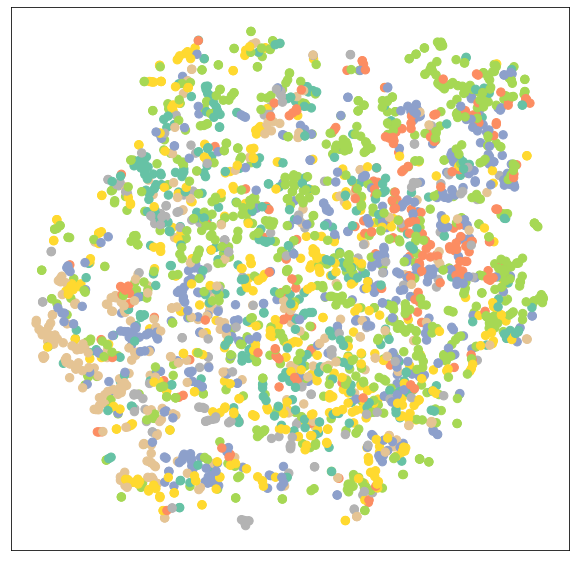

In [ ]:
model = GCN()
model.eval() # do not trian. use the model for evaluation (no gradient search)

out = model(data)  # get node embeddings without training the model
visualize(out, color=data.y)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)

# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

model.train() # turn model training mode on, since we switched it to eval before

def train():
      model.train()
      optimizer.zero_grad() # Clear gradients.
      out = model(data)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss based on training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

# define number of epochs
for epoch in range(1,51):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 1.9554
Epoch: 002, Loss: 1.8619
Epoch: 003, Loss: 1.7662
Epoch: 004, Loss: 1.6488
Epoch: 005, Loss: 1.5146
Epoch: 006, Loss: 1.3803
Epoch: 007, Loss: 1.2630
Epoch: 008, Loss: 1.1256
Epoch: 009, Loss: 1.0111
Epoch: 010, Loss: 0.9141
Epoch: 011, Loss: 0.8171
Epoch: 012, Loss: 0.6771
Epoch: 013, Loss: 0.6491
Epoch: 014, Loss: 0.5578
Epoch: 015, Loss: 0.4854
Epoch: 016, Loss: 0.4470
Epoch: 017, Loss: 0.3752
Epoch: 018, Loss: 0.3723
Epoch: 019, Loss: 0.3181
Epoch: 020, Loss: 0.2982
Epoch: 021, Loss: 0.2438
Epoch: 022, Loss: 0.2470
Epoch: 023, Loss: 0.2045
Epoch: 024, Loss: 0.1884
Epoch: 025, Loss: 0.1320
Epoch: 026, Loss: 0.1784
Epoch: 027, Loss: 0.1303
Epoch: 028, Loss: 0.1247
Epoch: 029, Loss: 0.1185
Epoch: 030, Loss: 0.1160
Epoch: 031, Loss: 0.1158
Epoch: 032, Loss: 0.1169
Epoch: 033, Loss: 0.0870
Epoch: 034, Loss: 0.1127
Epoch: 035, Loss: 0.0906
Epoch: 036, Loss: 0.0784
Epoch: 037, Loss: 0.0673
Epoch: 038, Loss: 0.0609
Epoch: 039, Loss: 0.0701
Epoch: 040, Loss: 0.0642


Evaluate our model on the test nodes:

In [ ]:
def test():
      model.eval()
      out = model(data)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()  # Check against ground-truth labels.
      test_acc = int(test_correct) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

test_acc = test()
print(f'Accuracy: {test_acc:.4f}')

Accuracy: 0.7920


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

out = model(data) 

y_pred = out.argmax(dim=1)
y_pred = y_pred[data.test_mask].cpu()

y_test = data.y[data.test_mask].cpu()

cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix [Actual (rows) X Predicted(columns)]: \n', cm)
print(classification_report(y_test,y_pred))
print('accuracy_score', accuracy_score(y_test, y_pred))

sensitivity1 = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity1)

Confusion Matrix [Actual (rows) X Predicted(columns)]: 
 [[101   4   3   5   6   3   8]
 [  6  77   3   3   0   2   0]
 [  3   5 133   3   0   0   0]
 [ 30  11  12 223  28  12   3]
 [  9   3   1   4 126   5   1]
 [  9   3   4   0   0  79   8]
 [  6   1   0   1   0   3  53]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       130
           1       0.74      0.85      0.79        91
           2       0.85      0.92      0.89       144
           3       0.93      0.70      0.80       319
           4       0.79      0.85      0.82       149
           5       0.76      0.77      0.76       103
           6       0.73      0.83      0.77        64

    accuracy                           0.79      1000
   macro avg       0.77      0.81      0.79      1000
weighted avg       0.81      0.79      0.79      1000

accuracy_score 0.792
Sensitivity :  0.927710843373494
Specificity :  0.9619047619047619


## Exercise 2.2.

In [ ]:
# Use the classification problem from Ex1 and represent it as a graph.
# Adust the code in Example 2 to your graph, run the code, report, and explain the results

# Example 3: Recommender systems [Bonus]

This example is based on [example(a)](https://colab.research.google.com/github/tomasonjo/blogs/blob/master/pyg2neo/Movie_recommendations.ipynb#scrollTo=v_F-Vr4Yz2A9) and [example(b)](https://pytorch-geometric.readthedocs.io/en/latest/notes/load_csv.html)

In this example we will load a graph from a  .csv file and create the network object.

Then, we will train a GNN model to generate movie recomendations of users.

In [ ]:
from torch_geometric.data import download_url, extract_zip

url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
extract_zip(download_url(url, '.'), '.')

movie_path = './movies.csv'#'./ml-latest-small/movies.csv'
rating_path =  './ratings.csv' #'./ml-latest-small/ratings.csv'ß

Extracting ./ml-latest-small.zip


In [ ]:
movie_path = './ml-latest-small/movies.csv'
rating_path = './ml-latest-small/ratings.csv'

load the data and observe it

In [ ]:
# movies table
import pandas as pd

pd.read_csv(movie_path)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# ratings table
pd.read_csv(rating_path)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### Optional: Shrink data so colab would be able to fit it in memory

In [ ]:
# make the dataset smaller
df_movie = pd.read_csv(movie_path)
df_movie = df_movie.iloc[1:100,]
df_movie.to_csv('movies.csv',index=None)

In [ ]:
df_rating = pd.read_csv(rating_path)
df_rating = df_rating[df_rating['movieId'].isin(df_movie['movieId'])]
df_rating.to_csv('ratings.csv',index=None)

### A function to read and create **movie attribute** vectors

In [ ]:
import torch
import pandas as pd

def load_node_csv(path, index_col, encoders=None, **kwargs):
    df = pd.read_csv(path, index_col=index_col, **kwargs)
    mapping = {index: i for i, index in enumerate(df.index.unique())} # mapes nodes to indices

    x = None
    if encoders is not None:
        xs = [encoder(df[col]) for col, encoder in encoders.items()]   # concatinate senstece-encoders and genre encoders into a single vector
        x = torch.cat(xs, dim=-1)

    return x, mapping

We will use user SentenceTransformers to represent movie titles as embedding vectors in a tensor of shape ``[num_titles, embedding_dim]``

In [ ]:
from sentence_transformers import SentenceTransformer

class SequenceEncoder(object):
    def __init__(self, model_name='all-MiniLM-L6-v2', device=None): # maps sentences & paragraphs to a 384 dimensional dense vector space
        self.device = device
        self.model = SentenceTransformer(model_name, device=device)

    @torch.no_grad()
    def __call__(self, df):
        x = self.model.encode(df.values, show_progress_bar=True,
                              convert_to_tensor=True, device=self.device)
        return x.cpu()

An encoder that converts genres of movies into categorical labels. 

1. Find all genres in the data
2. Create a tensor ``x`` of shape ``[num_movies, num_genres]``
3. Assign a ``1`` to ``x[i, j]`` in case the genre ``j`` is present in movie ``i`` (similar to hot encodings).

In [ ]:
class GenresEncoder(object):
    def __init__(self, sep='|'):
        self.sep = sep

    def __call__(self, df):
        genres = set(g for col in df.values for g in col.split(self.sep))
        mapping = {genre: i for i, genre in enumerate(genres)}

        x = torch.zeros(len(df), len(mapping))
        for i, col in enumerate(df.values):
            for genre in col.split(self.sep):
                x[i, mapping[genre]] = 1
        return x

**Create movie representation**

In [ ]:
movie_x, movie_mapping = load_node_csv(
    movie_path, index_col='movieId', 
    encoders={
        'title': SequenceEncoder(),
        'genres': GenresEncoder()
    }
  )

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/305 [00:00<?, ?it/s]

In [ ]:
movie_x.shape # we have 9742 movies (titles) each with 384 sentence-transformers embeddings + 20 unique genres = 404 dim

torch.Size([9742, 404])

**Creating User Attribute**

We use ``load_node_csv()`` to map users from ``userId`` to consecutive values.

No feature information for users, so we do not define encoders, only 1-hot emcoding tensor for users

In [ ]:
_, user_mapping = load_node_csv(rating_path, index_col='userId')

In [ ]:
len(user_mapping)

610

**Edge Encoding (attributes)**: connect users--movies using their ratings.

``load_edge_csv()`` returns the final ``edge_index`` representation of shape ``[2, num_ratings]`` from ``ratings.csv``, as well as any additional features present in the raw ``*.csv`` file

In [ ]:
def load_edge_csv(path, src_index_col, src_mapping, dst_index_col, dst_mapping,
                  encoders=None, **kwargs):
    df = pd.read_csv(path, **kwargs)

    src = [src_mapping[index] for index in df[src_index_col]] # userId
    dst = [dst_mapping[index] for index in df[dst_index_col]] # movieId
    edge_index = torch.tensor([src, dst])

    edge_attr = None
    if encoders is not None:
        edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
        edge_attr = torch.cat(edge_attrs, dim=-1)

    return edge_index, edge_attr

We define encoders to return additional edge-level feature information. 

For loading ratings in ``ratings.csv``, we define a functions (``IdentityEncoder``) that simply converts star rating into a tensor

In [ ]:
class IdentityEncoder(object):
    def __init__(self, dtype=None):
        self.dtype = dtype

    def __call__(self, df):
        return torch.from_numpy(df.values).view(-1, 1).to(self.dtype)

Finalize the ``HeteroData`` object

In [ ]:
edge_index, edge_label = load_edge_csv(
    rating_path,
    src_index_col='userId',
    src_mapping=user_mapping,
    dst_index_col='movieId',
    dst_mapping=movie_mapping,
    encoders={'rating': IdentityEncoder(dtype=torch.long)},
)

Now, we can build a heterogeneous pyG graph where different types of nodes contain different features.

Create a heterogeniuse graph (``HeteroData``) object with 2 node types

``users`` do not have features -->  we use 1-hote encoding of their index.

``movies`` have embeddings made of concatination of sentence-transformers and genre class embeddings

In [ ]:
from torch_geometric.data import HeteroData

data = HeteroData()

# Add user node features for message passing:
data['user'].x = torch.eye(len(user_mapping), device=device)

# Add movie node features
data['movie'].x = movie_x

# Add ratings between users and movies
data['user', 'rates', 'movie'].edge_index = edge_index
data['user', 'rates', 'movie'].edge_label = edge_label

# if you use GPU --> tansfer data object to GPU.
device = torch.device('cuda')
data = data.to(device)

data.to(device, non_blocking=True)

HeteroData(
  user={ x=[610, 610] },
  movie={ x=[9742, 404] },
  (user, rates, movie)={
    edge_index=[2, 100836],
    edge_label=[100836, 1]
  }
)

Convert `data` into an appropriate format for training a
graph-based machine learning model


In [ ]:
from torch_geometric.transforms import ToUndirected, RandomLinkSplit

# 1. Add a reverse ('movie', 'rev_rates', 'user') relation for message passing.
data = ToUndirected()(data)
del data['movie', 'rev_rates', 'user'].edge_label  # Remove "reverse" label. # https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html

print(data)

HeteroData(
  user={ x=[610, 610] },
  movie={ x=[9742, 404] },
  (user, rates, movie)={
    edge_index=[2, 100836],
    edge_label=[100836, 1]
  },
  (movie, rev_rates, user)={ edge_index=[2, 100836] }
)


In [ ]:
# 2. Perform a link-level split into training, validation, and test edges.
transform = RandomLinkSplit(
    num_val=0.05,
    num_test=0.1,
    neg_sampling_ratio=0.0,
    edge_types=[('user', 'rates', 'movie')],
    rev_edge_types=[('movie', 'rev_rates', 'user')],
)

train_data, val_data, test_data = transform(data)

# edge_label_index are the mask indices for train, validation, and test
print("train", train_data)
print("val", val_data)
print("test", test_data)

train HeteroData(
  user={ x=[610, 610] },
  movie={ x=[9742, 404] },
  (user, rates, movie)={
    edge_index=[2, 85712],
    edge_label=[85712, 1],
    edge_label_index=[2, 85712]
  },
  (movie, rev_rates, user)={ edge_index=[2, 85712] }
)
val HeteroData(
  user={ x=[610, 610] },
  movie={ x=[9742, 404] },
  (user, rates, movie)={
    edge_index=[2, 85712],
    edge_label=[5041, 1],
    edge_label_index=[2, 5041]
  },
  (movie, rev_rates, user)={ edge_index=[2, 85712] }
)
test HeteroData(
  user={ x=[610, 610] },
  movie={ x=[9742, 404] },
  (user, rates, movie)={
    edge_index=[2, 90753],
    edge_label=[10083, 1],
    edge_label_index=[2, 10083]
  },
  (movie, rev_rates, user)={ edge_index=[2, 90753] }
)


The pyG graph is ready.

Next, we will define a GNN that will predict ratings between 0 and 5 of movies by users.

Link prediction -- predict the relationship property (star rating) of a new user-movie link.

In [ ]:
# Define the GNN

class GNNEncoder(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels)
        self.conv2 = SAGEConv((-1, -1), out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x


class EdgeDecoder(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.lin1 = Linear(2 * hidden_channels, hidden_channels)
        self.lin2 = Linear(hidden_channels, 1)

    def forward(self, z_dict, edge_label_index):
        row, col = edge_label_index
        z = torch.cat([z_dict['user'][row], z_dict['movie'][col]], dim=-1)

        z = self.lin1(z).relu()
        z = self.lin2(z)
        return z.view(-1)

class Model(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.encoder = GNNEncoder(hidden_channels, hidden_channels)
        self.encoder = to_hetero(self.encoder, data.metadata(), aggr='sum')
        self.decoder = EdgeDecoder(hidden_channels)

    def forward(self, x_dict, edge_index_dict, edge_label_index):
        z_dict = self.encoder(x_dict, edge_index_dict)
        return self.decoder(z_dict, edge_label_index)

In [ ]:
weight = torch.bincount(torch.flatten(train_data['user', 'movie'].edge_label)) # counts the occurrence of each element
weight = weight.max() / weight

def weighted_mse_loss(pred, target, weight=None):
    weight = 1. if weight is None else weight[target].to(pred.dtype)
    return (weight * (pred - target.to(pred.dtype)).pow(2)).mean()

In [ ]:
import torch_geometric.transforms as T
from torch_geometric.nn import SAGEConv, to_hetero
from torch.nn import Linear
model = Model(hidden_channels=64).to(device)

In [ ]:
# Due to lazy initialization, we need to run one model step so the number
# of parameters can be inferred:
with torch.no_grad():
    model.encoder(train_data.x_dict, train_data.edge_index_dict)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
def train():
  model.train()
  optimizer.zero_grad()
  pred = model(train_data.x_dict, train_data.edge_index_dict,
                train_data['user', 'rates', 'movie'].edge_label_index)
  target = train_data['user', 'rates', 'movie'].edge_label
  loss = weighted_mse_loss(pred, target, weight)
  loss.backward()
  optimizer.step()
  return float(loss)

In [ ]:
# Mini batch training

# https://towardsdatascience.com/hands-on-graph-neural-networks-with-pytorch-pytorch-geometric-359487e221a8
'''
def train():
    loss_all = 0
    model.train()
    for data in train_loader:
      data = data.to(device)
      optimizer.zero_grad()  # Clear gradients.
      pred = model(data.x_dict, dt.edge_index_dict,
                  data['user', 'rates', 'movie'].edge_label_index, data.batch)
      target = data['user', 'rates', 'movie'].edge_label.to(device)
      weight_batch = torch.bincount(torch.flatten(data['user', 'movie'].edge_label)) # counts the occurrence of each element
      weight_batch = weight.max() / weight_batch
      loss = weighted_mse_loss(pred, target, weight_batch)
      loss.backward()
      loss_all += data.num_graphs * loss.item()
      optimizer.step()
    return loss_all / len(train_data)


# https://colab.research.google.com/drive/1I8a0DfQ3fI7Njc62__mVXUlcAleUclnb?usp=sharing#scrollTo=HvhgQoO8Svw4

SyntaxError: ignored

In [ ]:
@torch.no_grad()
def test(data):
    model.eval()
    pred = model(dt.x_dict, df.edge_index_dict,
                df['user', 'rates', 'movie'].edge_label_index)
    pred = pred.clamp(min=0, max=5)
    target = df['user', 'rates', 'movie'].edge_label.float()
    rmse = F.mse_loss(pred, target).sqrt()
    return float(rmse)

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.loader import DataLoader

    
device = torch.device('cuda')

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)

for epoch in range(1, 50):
    loss = train()
    train_rmse = test(train_data)
    val_rmse = test(val_data)
    test_rmse = test(test_data)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train: {train_rmse:.4f}, '
          f'Val: {val_rmse:.4f}, Test: {test_rmse:.4f}')

Predict new links between users and movies.

We will only consider links where the predicted rating is equal to 5.0.

In [ ]:
num_movies = len(movie_mapping)
num_users = len(user_mapping)

reverse_movie_mapping = dict(zip(movie_mapping.values(),movie_mapping.keys()))
reverse_user_mapping = dict(zip(user_mapping.values(),user_mapping.keys()))

results = []

for user_id in range(0,num_users): 

    row = torch.tensor([user_id] * num_movies)
    col = torch.arange(num_movies)
    edge_label_index = torch.stack([row, col], dim=0)

    pred = model(data.x_dict, data.edge_index_dict,
                 edge_label_index)
    pred = pred.clamp(min=0, max=5)

    user_neo4j_id = reverse_user_mapping[user_id]

    mask = (pred == 5).nonzero(as_tuple=True)

    ten_predictions = [reverse_movie_mapping[el] for el in  mask[0].tolist()[:10]] # select 10 recommendations for each user
    results.append({'user': user_neo4j_id, 'movies': ten_predictions})
    

In [ ]:
results

Note: we did not filter out existing links or ratings during predictions.